# Visualize Data

In [5]:
import os
import pandas as pd
import csv
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json

Generamos una lista con todas las columnas de los archivos a analizar.

In [6]:
with open("csv_columns.json") as file:
    columns = json.load(file)

columns_import = columns["columns_import_with_join"]
columns_export = columns["columns_export_with_join"]

In [75]:
def count_details_products(types):
    
    if types == "Importation":
        filename = "Join_Filter_Data" + os.sep + "import" + os.sep + "all_import.txt"
        columns = columns_import
        usecols =  ["YEAR", "MONTH", "ARANC_NAC"]
        
    else:
        filename = "Join_Filter_Data" + os.sep + "export" + os.sep + "all_export.txt"
        types = "Exportation"
        columns = columns_export
        usecols =  ["YEAR", "MONTH", "CODIGOARANCEL"]

    chunksize = 10 ** 3
    armonized_code_month = pd.DataFrame(columns = ["Year-Month", "ARANC", "Count"])
    
    for chunk in pd.read_csv(filename, chunksize=chunksize, names=columns,
                             header=None, sep=";", encoding="latin1", quoting=csv.QUOTE_NONE,
                             usecols = usecols):
        
        for name, group in chunk.groupby(usecols):
            date = "{} - {}".format(name[0], str(name[1]).zfill(2))
            found = armonized_code_month[(armonized_code_month["Year-Month"] == date) &
                                         (armonized_code_month["ARANC"] == name[2])]
            if found.any().any():
                armonized_code_month["Count"][(armonized_code_month["Year-Month"] == date) &
                                              (armonized_code_month["ARANC"] == name[2])] = found["Count"] + group.shape[0]
   
            else:
                armonized_code_month = armonized_code_month.append(pd.Series([date, name[2], group.shape[0]], 
                                                                   index=["Year-Month", "ARANC", "Count"]),
                                                                   ignore_index=True,)
         
    return armonized_code_month

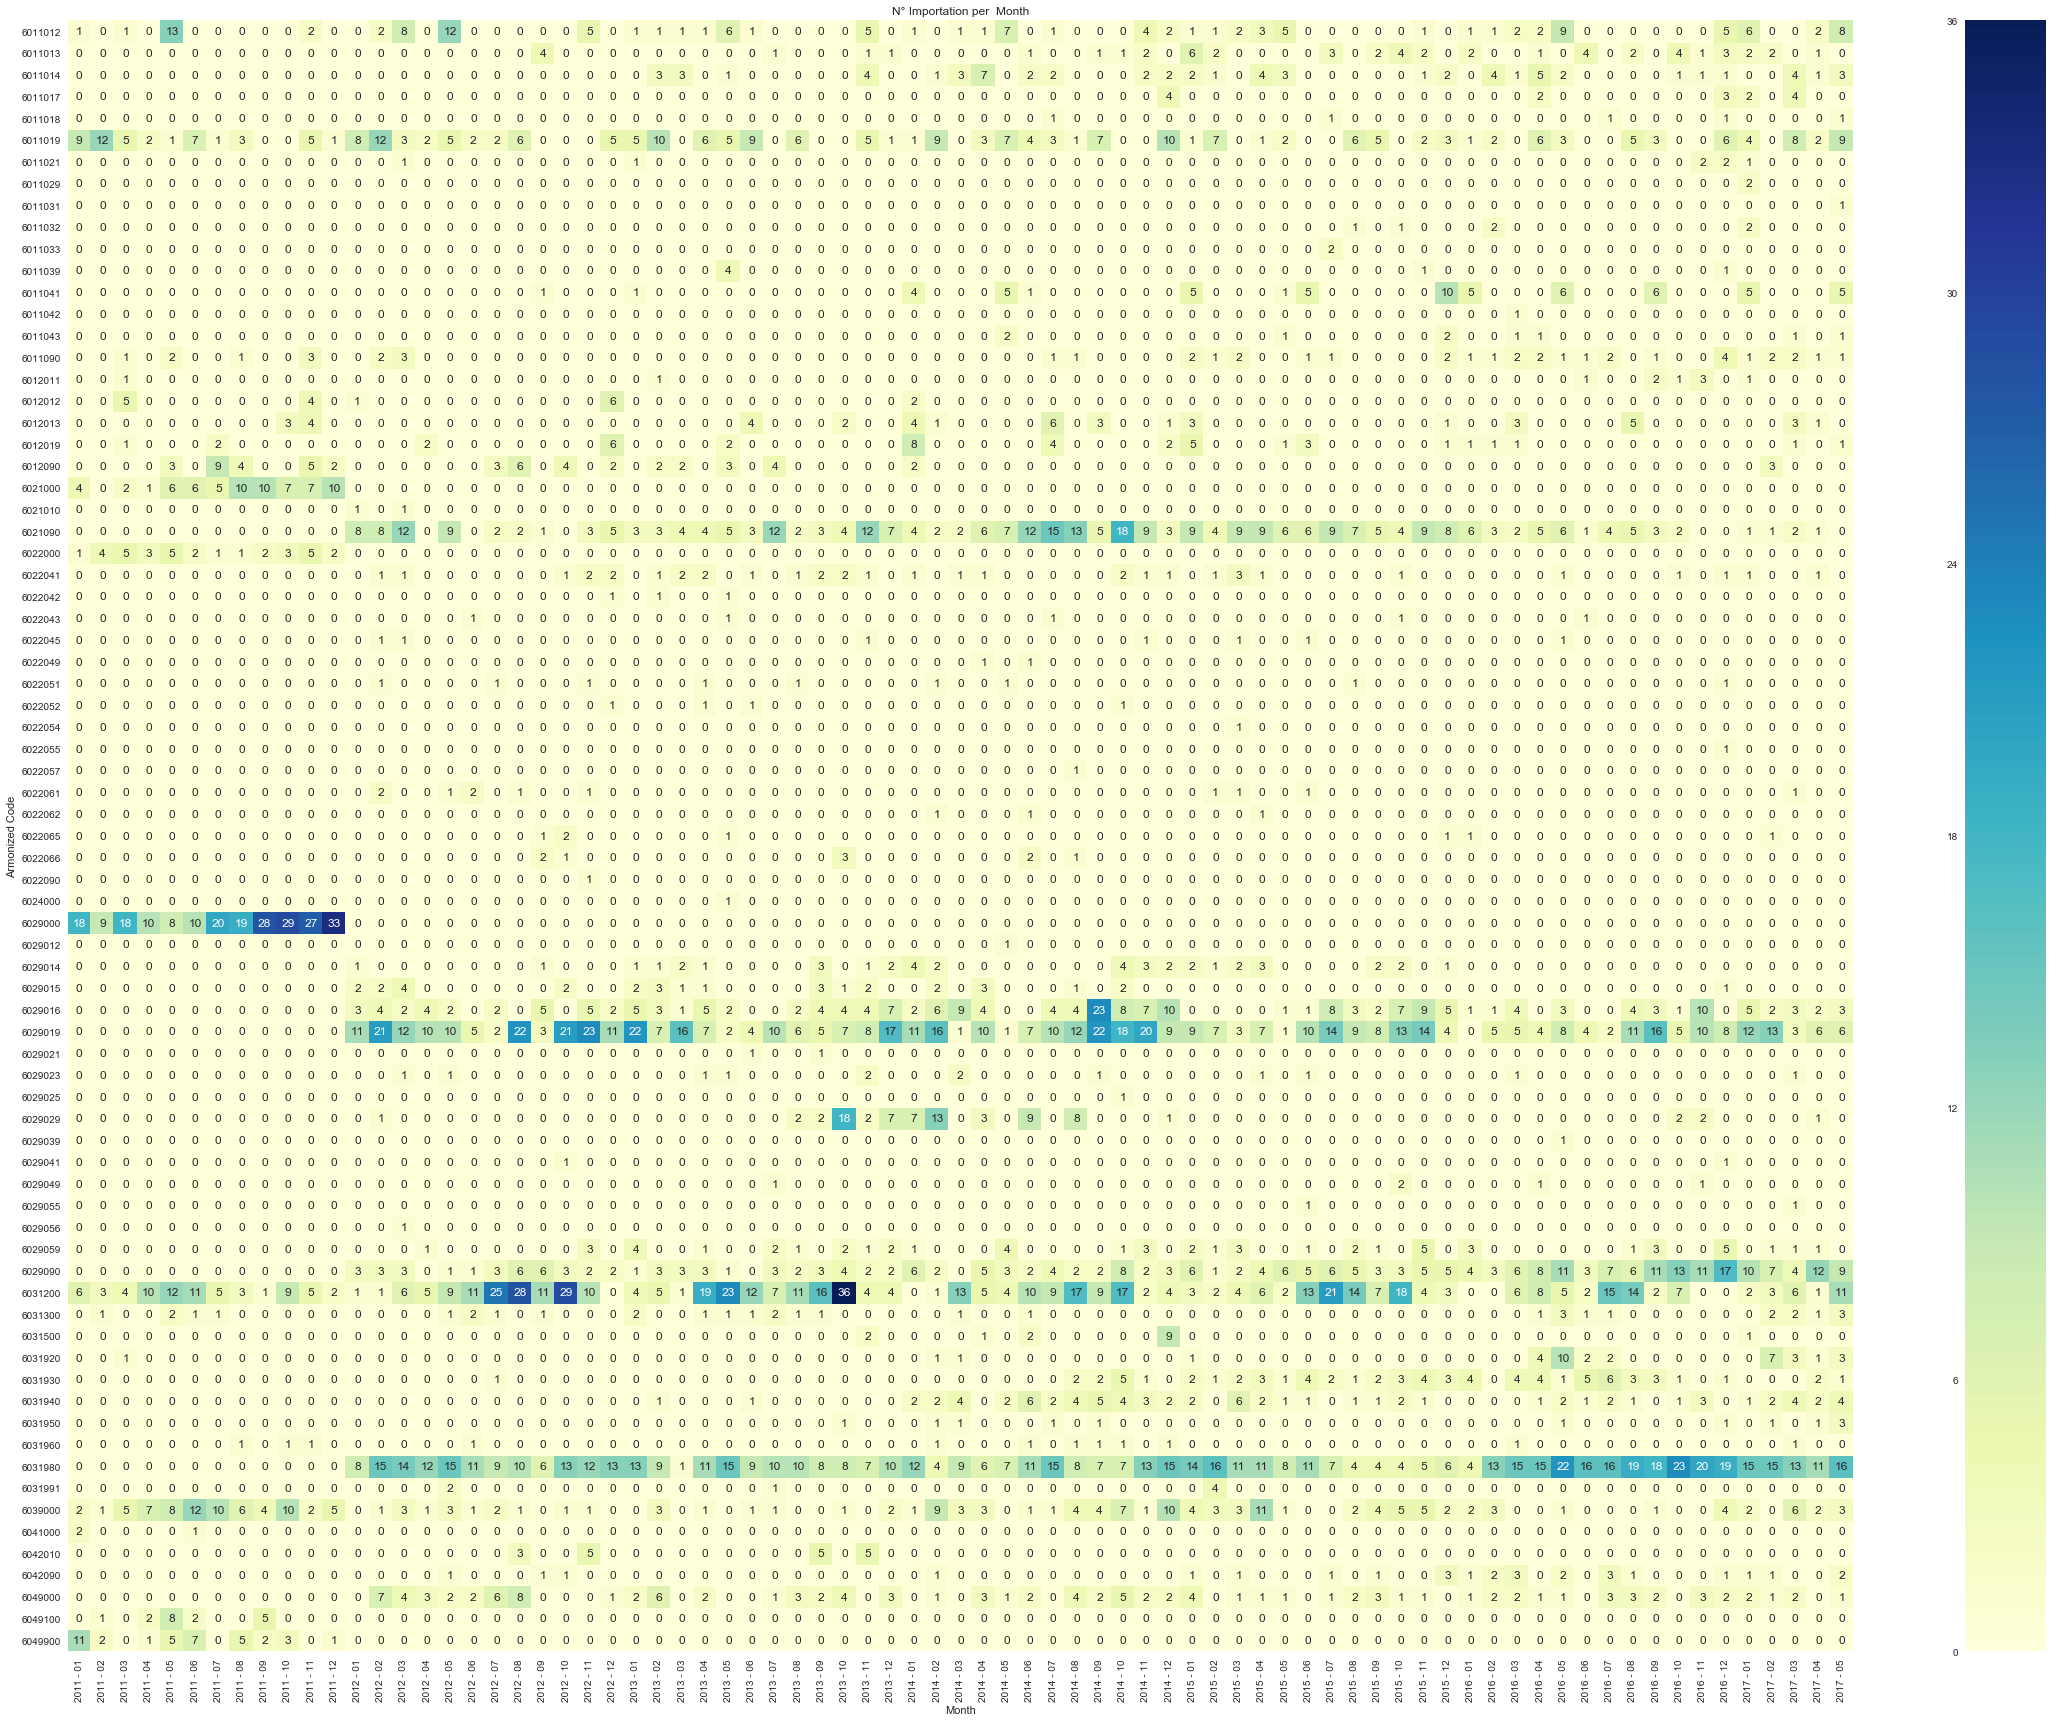

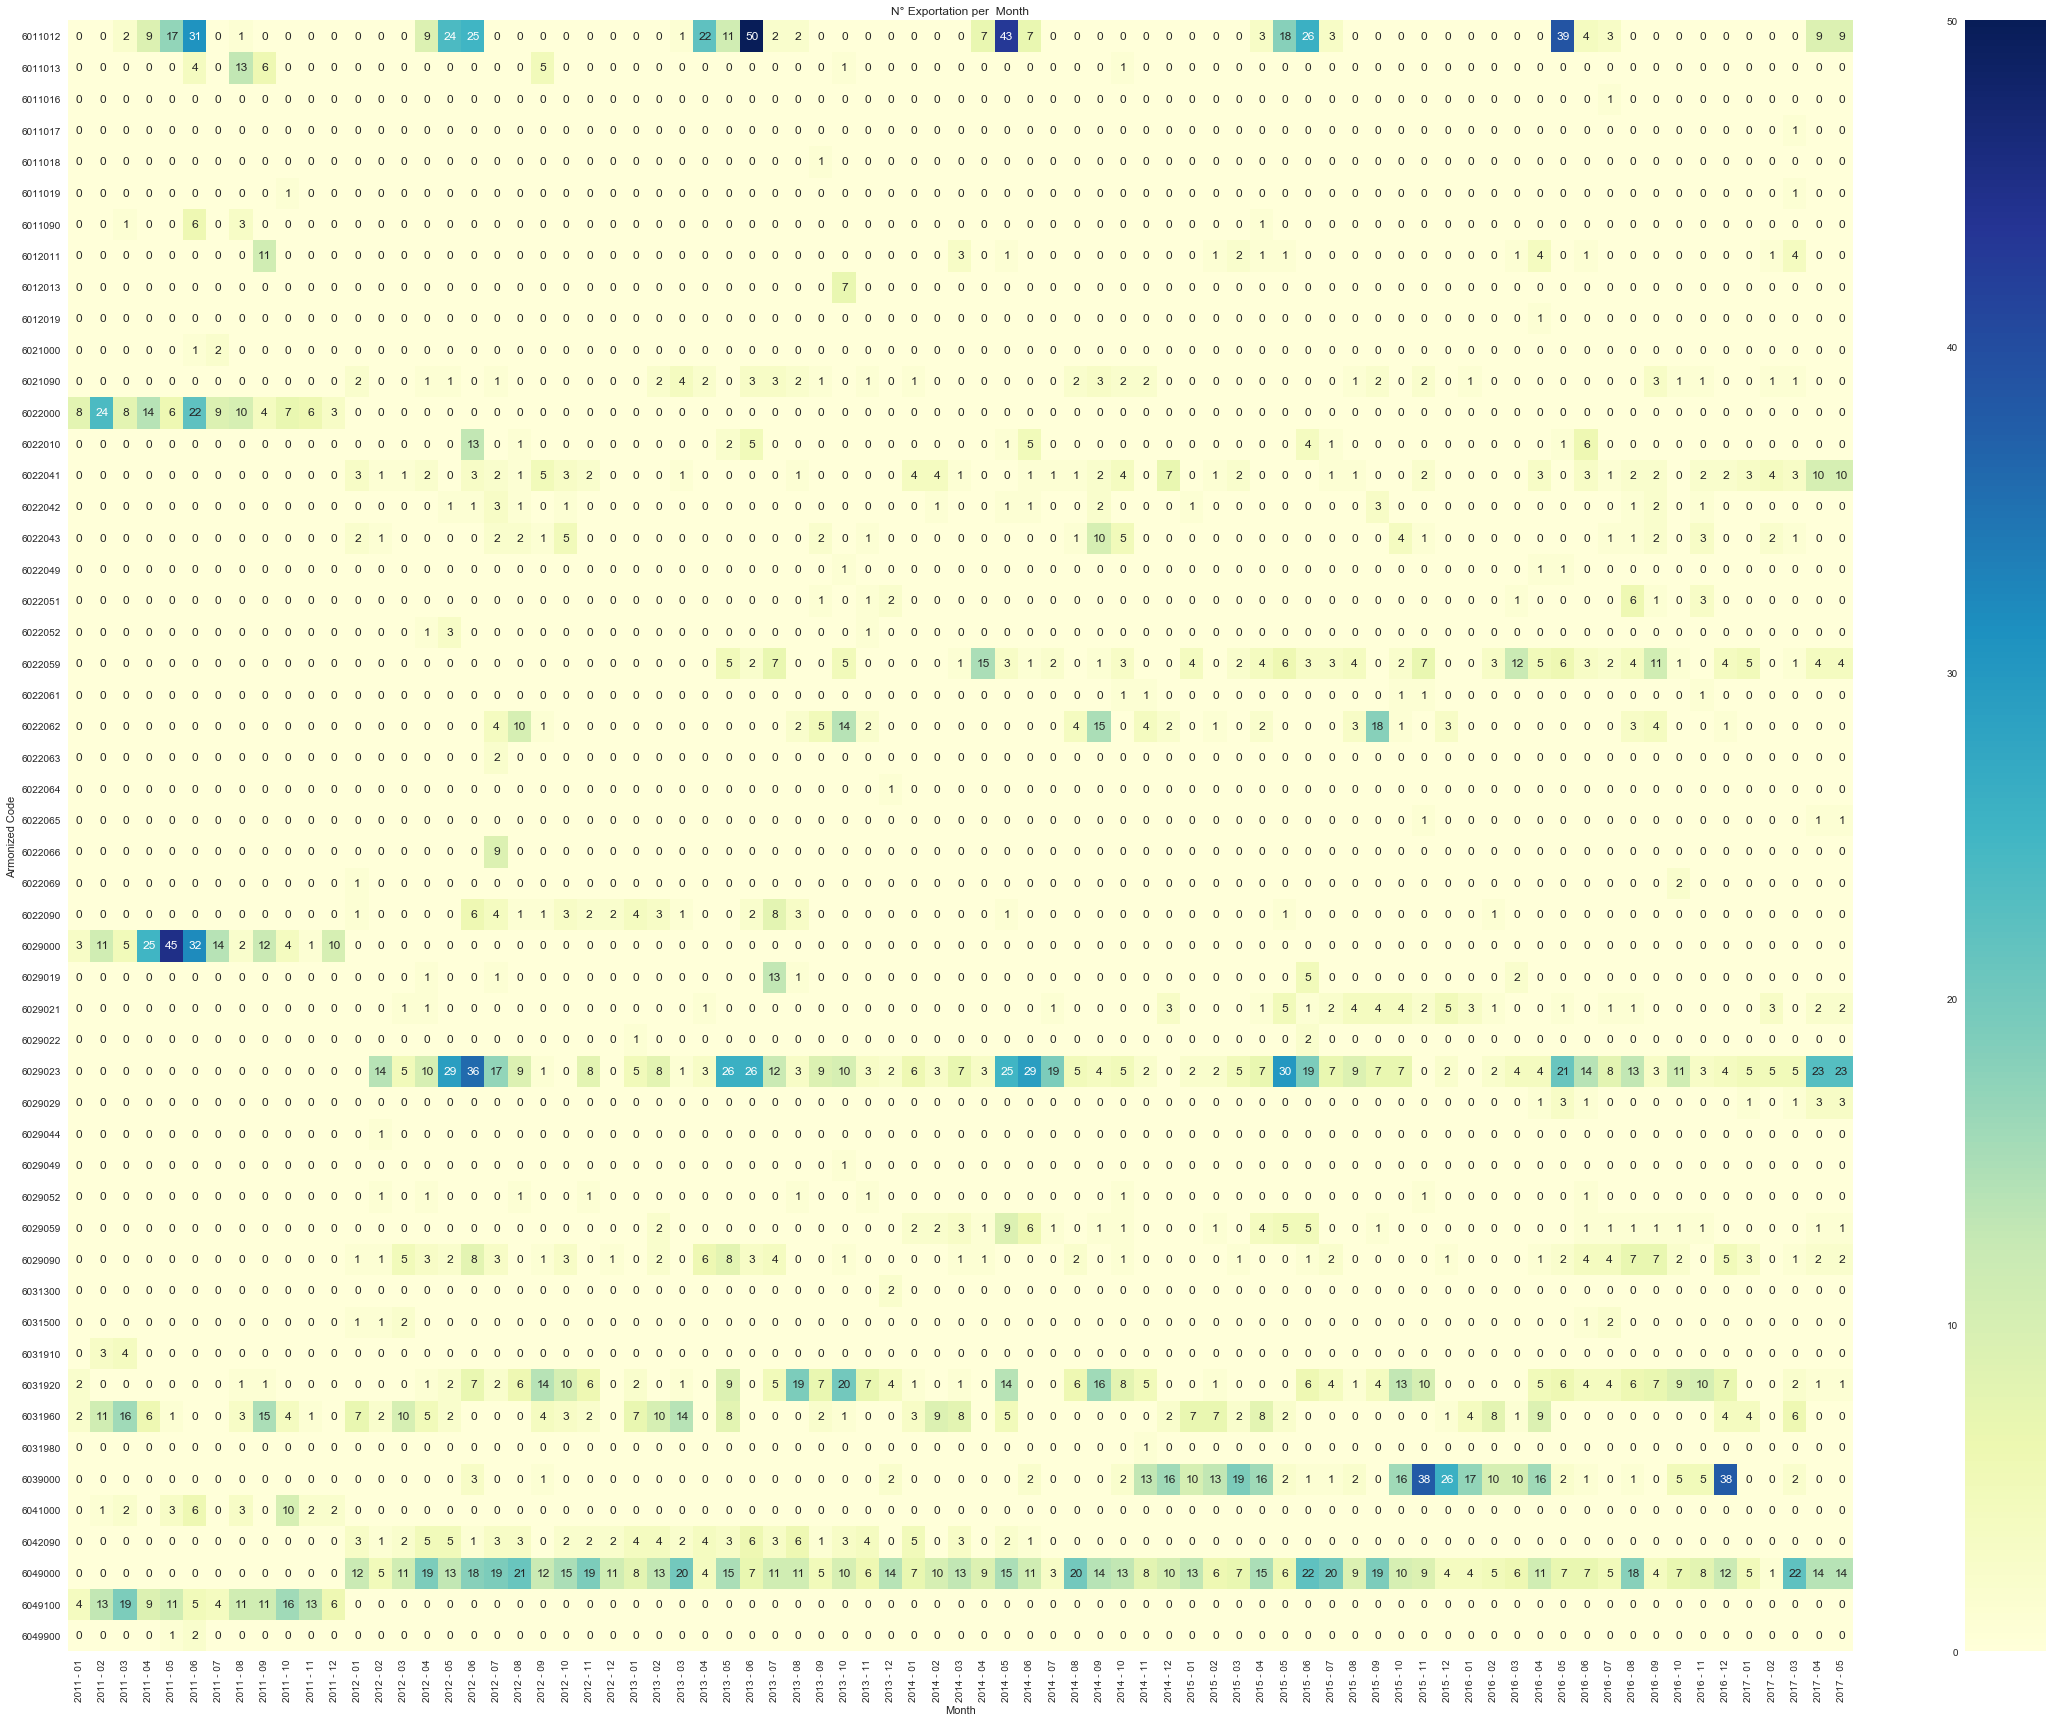

In [76]:
armonized_code_month_im = count_details_products("Importation")
armonized_code_month_im = armonized_code_month_im[(armonized_code_month_im["ARANC"] != 6011011) &
                                                  (armonized_code_month_im["ARANC"] != 6031100) &
                                                  (armonized_code_month_im["ARANC"] != 6031400) &
                                                  (armonized_code_month_im["ARANC"] != 6031970) &
                                                  (armonized_code_month_im["ARANC"] != 6031999) &
                                                  (armonized_code_month_im["ARANC"] != 6031990) &
                                                  (armonized_code_month_im["ARANC"] != 6031400)]

plt.figure(figsize=(40, 30))
armonized_code_month_im = armonized_code_month_im.pivot( "ARANC", "Year-Month", "Count")
armonized_code_month_im.fillna(value=0, inplace=True)

# Plot the heatmap
heatmap = sns.heatmap(armonized_code_month_im, annot=True, fmt="d", cmap="YlGnBu")

# Add a legend and informative axis label
sns.despine(left=True, bottom=True)
heatmap.set(xlabel='Month', ylabel='Armonized Code')
heatmap.set_title('N° Importation per  Month')

plt.show()

armonized_code_month_ex = count_details_products("Exportation")
armonized_code_month_ex = armonized_code_month_ex[(armonized_code_month_ex["ARANC"] != 6011011) &
                                                  (armonized_code_month_ex["ARANC"] != 6031990) &
                                                  (armonized_code_month_ex["ARANC"] != 6031930) &
                                                  (armonized_code_month_ex["ARANC"] != 6031999)]


plt.figure(figsize=(40, 30))
armonized_code_month_ex = armonized_code_month_ex.pivot( "ARANC", "Year-Month", "Count")
armonized_code_month_ex.fillna(value=0, inplace=True)

# Plot the heatmap
heatmap = sns.heatmap(armonized_code_month_ex, annot=True, fmt="d", cmap="YlGnBu")

# Add a legend and informative axis label
sns.despine(left=True, bottom=True)
heatmap.set(xlabel='Month', ylabel='Armonized Code')
heatmap.set_title('N° Exportation per  Month')

plt.show()
